In [ ]:
#import packages:

import numpy as np

np.set_printoptions(linewidth=np.inf) #this will make print output on the same line

import matplotlib.pyplot as plt

In [ ]:
np.random.seed(100)

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import json 

def keystoint(x):
    return {int(k): v for k, v in x.items()}

# this is the real phecode-icd9 mapping, 20 phecodes as topics, the corresponding icd9 as seeds for each phecode 
with open("gdrive/My Drive/Colab Notebooks/select_tokenized_phecode_icd.json", "r") as read_file:
    select_tokenized_phecode_icd = json.load(read_file, object_hook=keystoint)
    
print(select_tokenized_phecode_icd)
for key, value in select_tokenized_phecode_icd.items():
  print(key, value)

{0: [146, 205, 55, 269, 359, 75, 191, 88, 113, 257, 363, 178, 192, 378, 175, 344, 201, 46, 166, 242, 331, 329, 300, 341, 45, 260, 170, 27, 322, 54, 258, 130, 250, 212, 350, 277, 84, 43, 252, 230, 267, 236, 209, 9, 320, 288, 56, 285, 275, 139, 317, 314, 323, 134, 234, 101, 249, 82, 346, 187, 33, 295, 279, 203, 266, 78], 1: [2, 71, 99, 224, 89, 79, 3, 186, 302, 292, 7, 30, 337, 50, 348, 12], 2: [200, 28, 335, 117, 48, 385, 57, 15, 38, 4, 85, 133, 116, 356, 93, 360, 387, 181, 217, 118, 313, 210], 3: [109, 37, 167, 193, 318, 216, 115, 293], 4: [265, 34], 5: [243, 206, 227, 319, 208, 172, 119, 221, 255, 326, 202, 164, 304, 374, 96, 106, 272, 308, 283, 53, 218, 76, 10, 100, 160, 62, 343, 376, 328, 330, 367, 182, 51, 161, 153, 72, 238, 264, 174, 361, 253, 148, 144, 65, 86, 276, 31, 229, 81, 21, 289, 197, 179, 194, 327, 171, 309, 24, 152], 6: [270, 307, 58, 142, 215, 26, 196], 7: [47, 80, 324, 246, 1, 198, 235, 39, 226], 8: [338, 168, 97, 325, 20, 365, 156], 9: [271], 10: [375, 368, 132], 11: 

In [ ]:
K = len(select_tokenized_phecode_icd)
print(K)

20


In [ ]:
S = [0] * K
for i, values in enumerate(select_tokenized_phecode_icd.values()):
  S[i] = len(values)
print(S)
V = np.array(S).sum()
print(V)

[66, 16, 22, 8, 2, 59, 7, 9, 7, 1, 3, 22, 46, 1, 7, 33, 1, 31, 27, 20]
388


The Generation of the parameter $\eta$ under $T=1$ and $K=20$

In [ ]:
T = 1 # T is the amount of moments, K is the number of topic:

Beta_constant = 0.01

Mu_constant =  0.01

pi_constant = 0.7

D = 1000

#and how many words in each document, the N_d for each:

N_d_for_each = 25

Number_of_Words_for_each_Document = [N_d_for_each] * D

#initialization part for eta:

init_mean = np.random.uniform(0.5, 1, K)

delta = 1

In [ ]:
print(init_mean)

[0.77170247 0.63918469 0.7122588  0.92238807 0.50235943 0.56078456 0.83537454 0.91292638 0.56835329 0.78754666 0.94566098 0.60460106 0.59266411 0.55418845 0.60984875 0.98931189 0.90584157 0.58597051 0.90811237 0.63703687]


In [ ]:
#hyperparameters:

# This is the first real eta, the initial eta_0, at t_0, the very beginning:

cov_matrix_with_delta = delta * delta * np.identity(K)

eta_total_matrix = []

mean_t = init_mean

#this is used for debugging, not for our model:
mean_list_special_for_debugging_three_case_part = []

for i in range(0, T):

  mean_list_special_for_debugging_three_case_part.append(mean_t)

  eta_t = np.random.multivariate_normal(mean_t, cov_matrix_with_delta)

  eta_total_matrix.append(eta_t)

  mean_t = eta_t

eta_total_matrix = np.array(eta_total_matrix)
print(eta_total_matrix)

[[ 1.44442328  0.53477355  0.18097842  1.95212075  0.06422381 -0.55753369  2.4543562   2.45453155  0.31647416 -0.05488907  1.13017967  1.54168326  1.32366445  1.91574457  0.28361069  1.04498791  1.12824118 -0.85724649  0.15176007  1.45349088]]


In [ ]:
# mean_list_special_for_debugging_three_case_part

In [ ]:
Beta = [Beta_constant]*V

In [ ]:
Mu = []
for s in S:
  Mu.append([Mu_constant]*s)
sum = 0
for i in range(K):
  sum += len(Mu[i])
  print(Mu[i])
print(sum)

[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
[0.01, 0.01]
[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01

In [ ]:
V_vocabulary_words = np.array(list(range(V)))

In [ ]:
S_seed_words = select_tokenized_phecode_icd
print(S_seed_words) # dict: key is topic (phecode), value is a list of seed words for a topic (ICD codes)

{0: [146, 205, 55, 269, 359, 75, 191, 88, 113, 257, 363, 178, 192, 378, 175, 344, 201, 46, 166, 242, 331, 329, 300, 341, 45, 260, 170, 27, 322, 54, 258, 130, 250, 212, 350, 277, 84, 43, 252, 230, 267, 236, 209, 9, 320, 288, 56, 285, 275, 139, 317, 314, 323, 134, 234, 101, 249, 82, 346, 187, 33, 295, 279, 203, 266, 78], 1: [2, 71, 99, 224, 89, 79, 3, 186, 302, 292, 7, 30, 337, 50, 348, 12], 2: [200, 28, 335, 117, 48, 385, 57, 15, 38, 4, 85, 133, 116, 356, 93, 360, 387, 181, 217, 118, 313, 210], 3: [109, 37, 167, 193, 318, 216, 115, 293], 4: [265, 34], 5: [243, 206, 227, 319, 208, 172, 119, 221, 255, 326, 202, 164, 304, 374, 96, 106, 272, 308, 283, 53, 218, 76, 10, 100, 160, 62, 343, 376, 328, 330, 367, 182, 51, 161, 153, 72, 238, 264, 174, 361, 253, 148, 144, 65, 86, 276, 31, 229, 81, 21, 289, 197, 179, 194, 327, 171, 309, 24, 152], 6: [270, 307, 58, 142, 215, 26, 196], 7: [47, 80, 324, 246, 1, 198, 235, 39, 226], 8: [338, 168, 97, 325, 20, 365, 156], 9: [271], 10: [375, 368, 132], 11: 

The Second Part of the Generative Process: $\phi^r_k$, $\phi^s_k$, $\pi_k$

In [ ]:
# some containers:
phi_regular_total_matrix = np.zeros((K, V))
phi_seed_total_matrix = np.zeros((K, V))
pi_total_list = np.zeros((K))
print(phi_regular_total_matrix.shape)
# it is not K x S matrix, as S is different for each topic. 
# So we still use K x V to represent, value is 0 if the position (k, v) does not represent a seed word for topic k
print(phi_seed_total_matrix.shape)
print(pi_total_list.shape)

(20, 388)
(20, 388)
(20,)


In [ ]:
np.random.dirichlet(Mu[0]).shape

(66,)

In [ ]:
# initialize each container:
for k in range(0,K):
  phi_regular_total_matrix[k] = np.random.dirichlet(Beta)
  phi_s_k = np.random.dirichlet(Mu[k])
  seeds_k = S_seed_words[k]
  for i,s in enumerate(seeds_k):
    phi_seed_total_matrix[k][s] = phi_s_k[i]
  pi_total_list[k] = pi_constant
# print(phi_regular_total_matrix)
# print(phi_seed_total_matrix)
# print(pi_total_list)
# print(S_seed_words)

The Third Part of the Generative Process: $D, \alpha_{t_d}, N_d, z_{di}, x_{di}, w_{di}$

In [ ]:
# smoothReLu:
alpha_total_matrix  = np.log(1+np.exp(eta_total_matrix))
alpha_total_matrix = np.full((1, K), 0.2)

# [0.1]*K, test alpha for static
# use dynamic to compare with static model (alpha is hyperparameter)
# markov model to set age group
# for dynamic model, alpha is matrix

In [ ]:
theta_total_matrix = []

z_topic_assignment_total_matrix = []

x_indicator_total_matrix = []

words_total_matrix = []

In [ ]:
for d in range(0,D):
  alpha_t_d = alpha_total_matrix[0] #this is same for all since we only have one moment now, or find the time document published later:
  theta_t_d = np.random.dirichlet(alpha_t_d)
  theta_total_matrix.append(theta_t_d)
  #this is used for recording the information about each document and then used for comparing with our documents:
  z_t_d = []
  x_t_d = []
  w_t_d = []

  for i in range(0, Number_of_Words_for_each_Document[d]):
    z_d_i = np.random.multinomial(1,theta_t_d) #draw once and under one-hot format
    #store it:
    # first [0] is taking the first argument of the returned tuple, 
    #second [0] is take the number in the array since it is like array([1]) format
    z_d_i_position = np.where(z_d_i==1)[0][0]
    z_t_d.append(z_d_i_position)
    pi_z_d_i = pi_total_list[z_d_i_position]
    x_d_i = np.random.binomial(1, pi_z_d_i) # this is not one-hot format, directly 0 or 1
    x_t_d.append(x_d_i)
    if (x_d_i == 0):
      w_d_i = np.random.multinomial(1,phi_regular_total_matrix[z_d_i_position])
      w_d_i_position = np.where(w_d_i==1)[0][0]
      w_t_d.append(w_d_i_position)
    elif (x_d_i == 1):
      w_d_i = np.random.multinomial(1, phi_seed_total_matrix[z_d_i_position])
      w_d_i_position = np.where(w_d_i==1)[0][0]
      w_t_d.append(w_d_i_position)
    
  z_t_d = np.array(z_t_d)
  x_t_d = np.array(x_t_d)
  w_t_d = np.array(w_t_d)

  z_topic_assignment_total_matrix.append(z_t_d)
  x_indicator_total_matrix.append(x_t_d)
  words_total_matrix.append(w_t_d)

In [ ]:
# convert them into numpy array format:
theta_total_matrix = np.array(theta_total_matrix)
z_topic_assignment_total_matrix = np.array(z_topic_assignment_total_matrix)
x_indicator_total_matrix = np.array(x_indicator_total_matrix)
words_total_matrix = np.array(words_total_matrix)
print(theta_total_matrix.shape, z_topic_assignment_total_matrix.shape, x_indicator_total_matrix.shape, words_total_matrix.shape)

(1000, 20) (1000, 25) (1000, 25) (1000, 25)


**Important notes: z_topic_assignment_total_matrix, x_indicator_total_matrix, words_total_matrix, should have same dimension, or in other words, same size in each layer. This can be viewed by print length of each part, and then see whether these values are same.**

checking some variables and calculations about $n_{wk}$ and $n_{.k}$ at given time $t$, we just check at $t=0$, and of course, this can be generalized later:

In [ ]:
n_w_k_total_matrix = np.zeros([V, K])
n_w_k_total_matrix.shape # V x K

(388, 20)

In [ ]:
# computer n_w_k by iterating words:
for d in range(0, D):
  for w in range(0, Number_of_Words_for_each_Document[d]):
    #every count is zero at the beginning, we add all regular word counts
    if x_indicator_total_matrix[d][w] == 0:
      regular_w_position = words_total_matrix[d][w]
      n_w_k_total_matrix[regular_w_position][z_topic_assignment_total_matrix[d][w]] += 1 

In [ ]:
n_w_k_total_matrix.shape

(388, 20)

In [ ]:
n_dot_k_total_matrix = np.sum(n_w_k_total_matrix, axis=0) #then we can computer n_._k, it is a K length vector
n_dot_k_total_matrix

array([457., 399., 362., 416., 405., 363., 332., 392., 378., 371., 327., 407., 381., 332., 396., 378., 356., 335., 316., 388.])

In [ ]:
#in our setting, phi_regular_total_matrix is KxV:
phi_regular_total_matrix.shape

(20, 388)

The integraded variables $\phi_{wk}^r, \phi_{wk}^s$: This is very easy to see what is the meaning of estimation and when we will get a good estimation by using the following ones, we can see that one answer should be the size of hyperparameters compared with the counting variables. Let's say, if they are same, then it is too large for the model, and for sure it will bring a lot of errors due to this improper choice.

\begin{equation}
    \phi^r_{wk} = \frac{n_{wk} + \beta}{\sum_w^V n_{vk} + V \beta} = \frac{n_{wk} + \beta}{n_{.k} + V \beta}
\end{equation}

In [ ]:
Beta=np.array(Beta)

In [ ]:
Mu_sum = np.zeros(K)
for k in range(K):
  Mu[k] = np.array(Mu[k])
  Mu_sum[k] += np.sum(Mu[k])
print(Mu_sum)

[0.66 0.16 0.22 0.08 0.02 0.59 0.07 0.09 0.07 0.01 0.03 0.22 0.46 0.01 0.07 0.33 0.01 0.31 0.27 0.2 ]


In [ ]:
phi_regular_k_w_total_matrix_integrated=np.zeros([K, V])
for k in range(0,K):
  for w in range(0,V):
    phi_regular_k_w_total_matrix_integrated[k][w] = (n_w_k_total_matrix[w][k]+Beta[w])/(n_dot_k_total_matrix[k]+np.sum(Beta))

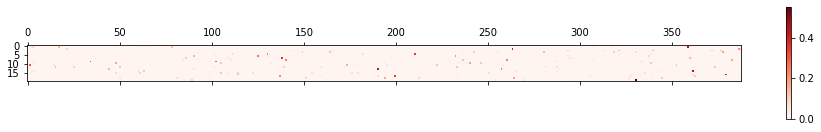

In [ ]:
plt.matshow(phi_regular_total_matrix, cmap='Reds') # real
plt.colorbar()

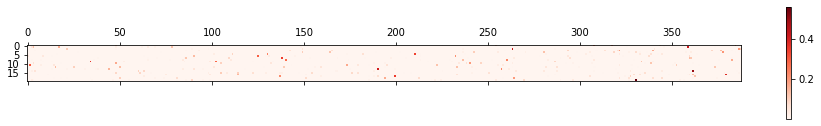

In [ ]:
plt.matshow(phi_regular_k_w_total_matrix_integrated, cmap='Reds') # count computing
plt.colorbar()

\begin{equation}
    \phi^s_{wk} = \frac{s_{wk} + \mu}{\sum_w^S s_{vk} + S \mu}
    = \frac{s_{wk} + \mu}{s_{.k} + S \mu}
\end{equation}

In [ ]:
s_w_k_total_matrix = np.zeros([V, K])
s_w_k_total_matrix.shape

(388, 20)

In [ ]:
for d in range(0,D):
  for w in range(0,Number_of_Words_for_each_Document[d]):
    if x_indicator_total_matrix[d][w] == 1:
      seed_w_position = words_total_matrix[d][w]
      s_w_k_total_matrix[seed_w_position][z_topic_assignment_total_matrix[d][w]]+= 1

In [ ]:
s_dot_k_total_matrix = np.zeros(K)
s_dot_k_total_matrix = np.sum(s_w_k_total_matrix, axis=0)
print(s_dot_k_total_matrix)

[975. 946. 856. 925. 953. 932. 856. 917. 891. 859. 834. 913. 812. 865. 868. 830. 894. 783. 779. 821.]


In [ ]:
phi_seed_k_w_total_matrix_integrated = np.zeros((K, V))
for k in range(K):
  for w in range(S[k]):
    seed_w_position = S_seed_words[k][w]
    phi_seed_k_w_total_matrix_integrated[k][seed_w_position] = (s_w_k_total_matrix[seed_w_position][k]+Mu[k][w]) / (s_dot_k_total_matrix[k]+Mu_sum[k])

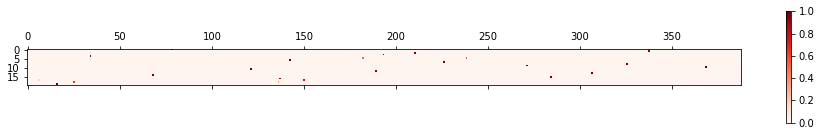

In [ ]:
plt.matshow(phi_seed_total_matrix, cmap='Reds') # real
plt.colorbar()

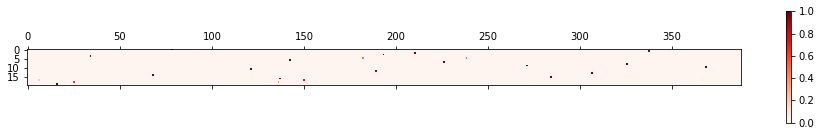

In [ ]:
plt.matshow(phi_seed_k_w_total_matrix_integrated, cmap='Reds') # count computing
plt.colorbar()

In [ ]:
m_d_k_total_matrix = np.zeros([D, K])

for d in range(0, D):
  for w in range(0, Number_of_Words_for_each_Document[d]):
    m_d_k_total_matrix[d][z_topic_assignment_total_matrix[d][w]] += 1

m_d_dot_total_matrix = np.sum(m_d_k_total_matrix, axis=1)
print(m_d_dot_total_matrix)

[25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25.

The approximation formula for $\theta_{dk}$, again this performance will also be influenced if $\alpha_{td}$ is very large or the ratio between them is not good. These parts can all become the source errors for certain parts:

\begin{align}
    \theta_{dk}  &= \frac{m_{dk} + \alpha_{t_dk}}{\sum_k^K \left (m_{dk} +  \alpha_{t_dk} \right)} = \frac{m_{dk} + \alpha_{t_dk}}{m_{d.} + \sum_k^K \alpha_{t_dk}} 
     = \frac{m_{dk} + \alpha_{t_dk}}{N_d + \sum_k^K \alpha_{t_dk}}
\end{align}

In [ ]:
theta_d_k_total_matrix = np.zeros([D,K])
for d in range(D):
  for k in range(K):
    theta_d_k_total_matrix[d][k] = (m_d_k_total_matrix[d][k]+ alpha_total_matrix[0][k]) / (m_d_dot_total_matrix[d]+np.sum(alpha_total_matrix))

(1000, 20)


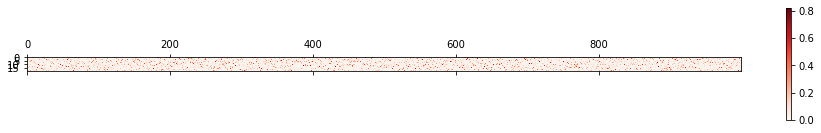

In [ ]:
plt.matshow(theta_total_matrix.transpose(), cmap='Reds') # real
plt.colorbar() # here has more diffence
print(theta_total_matrix.shape)

(1000, 20)


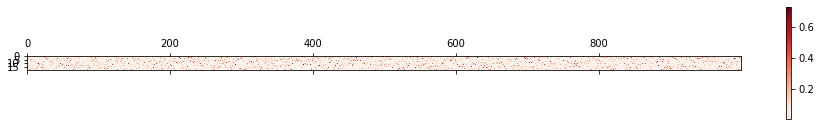

In [ ]:
plt.matshow(theta_d_k_total_matrix.transpose(), cmap='Reds') # count computing
plt.colorbar()
print(theta_d_k_total_matrix.shape)

**We attempt to prove the proposed posterior distribution and formulas can match the real distribution. Here, we represent real gammas: $\gamma_{idk}^{ss}$, $\gamma_{idk}^{sr}$, $\gamma_{idk}^{rr}$.**

If $w_{di}$ is a seed word and topic assignment $z_{di} = k$ is regular topic:

\begin{align}
    \gamma_{dik}^{sr} \propto (m_{dk}^{-di} + \alpha_{t_d k}) \cdot 
    \frac{n_{wk}^{-di}+ \beta} {n_{.k}^{-di}+ V \beta} \cdot  (1-\pi)
\end{align}

If $w_{di}$ is a seed word and topic assignment $z_{di} = k$ is seed topic:

\begin{align}
    \gamma_{dik}^{ss} \propto 
    (m_{dk}^{-di} + \alpha_{t_d k}) \cdot 
    \frac{s_{wk}^{-di} + \mu} {s_{.k}^{-di}+ S \mu} \cdot 
    \pi
\end{align}

If $w_{di}$ is a regular word, the topic assignment $z_{di} = k$  must be a regular topic:

\begin{align}
    \gamma_{dik}^{rr} \propto
    (m_{dk}^{-di} + \alpha_{t_d k}) \cdot 
    \frac{n_{wk}^{-di}+ \beta} {n_{.k}^{-di}+ V \beta}
\end{align}


This is a translation function which will read the meaning of the returned index from $0-3*K-1$ ($3*K$ in total) positions, this will tell you the $x_{di}$ and $z_{di}$ from interpreting this returned index.

In [ ]:
def Found_Index_From_Gamma(index_found):
  predicted_x_di = 0
  predicted_z_di = index_found % K
  if (0<= index_found <= (3*K-1)):
    if (0<= index_found <= (K-1)):
      predicted_x_di = 1
    return predicted_x_di, predicted_z_di
  else:
    print("The found index is not matched with the number of topics in this case")

In [ ]:
# for index in range(0,3*K):
#   print(Found_Index_From_Gamma(index))

In [ ]:
V_vocabulary_words = np.array(V_vocabulary_words)

**We avoid to use $m_{dk}^{-di}, n_{wk}^{-id} ,n_{.k}^{-di}, s_{wk}^{-di}, s_{.k}^{-di}$ in real application, since as subtracting only 1 does not make big difference. But we only test the correction of formulas right now, thus we use full representation**

In [ ]:
def calculate_n_wk_not_di(w, k, not_d, not_i):
  return_value = n_w_k_total_matrix[w][k]
  if w == words_total_matrix[not_d][not_i]:
    if x_indicator_total_matrix[not_d][not_i] == 0 :
      if z_topic_assignment_total_matrix[not_d][not_i] == k:
        return (return_value - 1)
      else:
        return return_value
    else: 
      return return_value
  else:
    return return_value

In [ ]:
def calculate_n_dot_k_not_di(k, not_d, not_i):
  return_value = n_dot_k_total_matrix[k]
  if x_indicator_total_matrix[not_d][not_i] == 0:
    if z_topic_assignment_total_matrix[not_d][not_i] == k:
      return (return_value - 1)
    else:
      return return_value
  else:
    return return_value

In [ ]:
def calculate_s_wk_not_di(w, k, not_d, not_i):
  return_value = s_w_k_total_matrix[w][k]
  # this is a trivial checking we don't really need this part, but in case we forget something:
  if w == words_total_matrix[not_d][not_i]:
    if x_indicator_total_matrix[not_d][not_i] == 1:
      if z_topic_assignment_total_matrix[not_d][not_i] == k:
        return (return_value - 1)
      else:
        return return_value
    else: 
      return return_value
  else:
    return return_value

In [ ]:
def calculate_s_dot_k_not_di(k, not_d, not_i):
  return_value = s_dot_k_total_matrix[k]
  if x_indicator_total_matrix[not_d][not_i] == 1:
    if z_topic_assignment_total_matrix[not_d][not_i] == k:
      return (return_value - 1)
    else:
      return return_value
  else: 
    return return_value

In [ ]:
def calculate_mdk_not_di(k, not_d, not_i):
  return_value = m_d_k_total_matrix[not_d][k]
  return return_value
  # if z_topic_assignment_total_matrix[not_d][not_i] == k:
  #   return return_value - 1
  # else:
  #   return return_value

def calculate_m_d_dot_not_di(not_d, not_i):
  return_value = m_d_k_total_matrix[not_d].sum()
  return return_value
  # if z_topic_assignment_total_matrix[not_d][not_i] == k:
  #   return N_d_for_each - 1
  # else:
  #   return N_d_for_each

In [ ]:
# you can simply put all 0 here, because we will replace them by real value directly:
# for may be combined with the other loop:

real_gamma_total_matrix = []

for d in range(0,D):
  real_gamma_total_matrix.append([])
  for i in range(0, Number_of_Words_for_each_Document[d]):
    # using 0.0 it is better and also depend on which kind of implementation you will use:
    # if you choose to never touch certain area and you have values, then it will lead the error of normalization namely the total sum is not 1
    # so using 0.0, and be careful about this
    real_gamma_total_matrix[d].append(np.array([0.0]*(3*K)))
    real_gamma_total_matrix[d][i] = np.array(real_gamma_total_matrix[d][i])
  real_gamma_total_matrix[d] = np.array(real_gamma_total_matrix[d])
real_gamma_total_matrix = np.array(real_gamma_total_matrix)

In [ ]:
real_gamma_total_matrix.shape # D X N x K 

(1000, 25, 60)

$\gamma_{dik}^{ss}$ is in the first K positions, then $\gamma_{dik}^{sr}$ in the second K positions, and $\gamma_{dik}^{rr}$ at the last K positions.

If $w_{di}$ is a seed word and topic assignment $z_{di} = k$ is seed topic:

\begin{align}
    \gamma_{dik}^{ss} \propto 
    (m_{dk}^{-di} + \alpha_{t_d k}) \cdot 
    \frac{s_{wk}^{-di} + \mu} {s_{.k}^{-di}+ S \mu} \cdot 
    \pi_k
\end{align}

If $w_{di}$ is a seed word and topic assignment $z_{di} = k$ is regular topic:

\begin{align}
    \gamma_{dik}^{sr} \propto (m_{dk}^{-di} + \alpha_{t_d k}) \cdot 
    \frac{n_{wk}^{-di}+ \beta} {n_{.k}^{-di}+ V \beta} \cdot  (1-\pi_k)
\end{align}

If $w_{di}$ is a regular word, the topic assignment $z_{di} = k$  must be a regular topic:

\begin{align}
    \gamma_{dik}^{rr} \propto
    (m_{dk}^{-di} + \alpha_{t_d k}) \cdot 
    \frac{n_{wk}^{-di}+ \beta} {n_{.k}^{-di}+ V \beta}
\end{align}

In [ ]:
np.set_printoptions(precision=20)
for d in range(0,D):
  for i in range(0, Number_of_Words_for_each_Document[d]):
    # this is checked for the conditions, since there should be one part of them which has 0 values:
    temp_denominator = 0
    for k in range(0,K):
      if words_total_matrix[d][i] in S_seed_words[k]:
        w = words_total_matrix[d][i]
        seed_position = np.where(S_seed_words[k] == w)[0][0]
        temp_result_1 = (calculate_mdk_not_di(k,d,i) + alpha_total_matrix[0][k]) * (calculate_s_wk_not_di(w, k, d, i) + Mu[k][seed_position]) / (calculate_s_dot_k_not_di(k,d,i) + Mu_sum[k]) * pi_total_list[k]
        real_gamma_total_matrix[d][i][k] = temp_result_1
        temp_result_2 = ((calculate_mdk_not_di(k,d,i) + alpha_total_matrix[0][k]) * (calculate_n_wk_not_di(words_total_matrix[d][i],k,d,i) + Beta_constant) 
                        / (calculate_n_dot_k_not_di(k,d,i) + V*Beta_constant) * (1-pi_total_list[k]))
        real_gamma_total_matrix[d][i][K+k] = temp_result_2
        temp_denominator = temp_denominator + temp_result_1 + temp_result_2
      else:
        temp_result_3 = ((calculate_mdk_not_di(k,d,i) + alpha_total_matrix[0][k]) * (calculate_n_wk_not_di(words_total_matrix[d][i],k,d,i) + Beta_constant)
                        / (calculate_n_dot_k_not_di(k,d,i) + V*Beta_constant))
        real_gamma_total_matrix[d][i][2*K+ k] = temp_result_3
        temp_denominator = temp_denominator + temp_result_3
    
    for k in range(0,3*K):
        real_gamma_total_matrix[d][i][k] = real_gamma_total_matrix[d][i][k] / temp_denominator

In [ ]:
#This is used to check whether normalization is carried out properly:
for d in range(0,D):
  for i in range(0,Number_of_Words_for_each_Document[d]):
    #because of float point number, it is better that don't simple use equal symbol here:
    if ( np.abs(np.sum(real_gamma_total_matrix[d][i]) - 1 )>0.000002):
      print("error!")

**There should be another very important variables to be test, the real distribution of $\gamma_{dik}^{ss}$, $\gamma_{dik}^{sr}$,$\gamma_{dik}^{rr}$, if we can't use the real values to find the best fit (only one combo for each position di), then this means that our three-case formula is wrong, this needs to be checked before we implement the variational version of them:**

**We can analyze the results by the following helper function:**

In [ ]:
#real_gamma_total_matrix
def Best_Fit_Way_to_interpret_results_for_real_gamma():

  count_total = 0
  count_total_always_add_1 = 0

  count_numerator_for_x_di = 0
  count_denominator_always_add_1_for_x_di = 0
  count_numerator_for_z_di = 0
  count_denominator_always_add_1_for_z_di = 0

  for d in range(0,D):
    
    for i in range(0, Number_of_Words_for_each_Document[d]):

      Temp_x_di, Temp_z_di = Found_Index_From_Gamma(np.argmax(real_gamma_total_matrix[d][i]))

      if  Temp_x_di == x_indicator_total_matrix[d][i] and Temp_z_di == z_topic_assignment_total_matrix[d][i]:

        count_total += 1

      count_total_always_add_1 += 1


      
      if Temp_x_di == x_indicator_total_matrix[d][i]:
        
        count_numerator_for_x_di += 1
        
      #this one always adds one just for counting all locations visited
      
      count_denominator_always_add_1_for_x_di += 1
      
      if Temp_z_di == z_topic_assignment_total_matrix[d][i]:
        
        count_numerator_for_z_di += 1
      
      count_denominator_always_add_1_for_z_di += 1

  print("The number of documents, D, is", D, ".")

  print("Each document has the number of words at", N_d_for_each, ".")

  print("The number of topics, K, is", K, ".")

  print("The number of all words, V, is", V, ".")

  print("The number of seed words, S, is", S, ".")

  print("The beta_constant is", Beta_constant, ".")

  print("The mu_constant is", Mu_constant, ".")

  print("The pi_constant is", pi_constant,".")

  print("The overall accuracy for inferring the topic assignments and indicators, z_di and x_di, by using best fit only way to interpret is at",
        count_total/count_total_always_add_1 *100, "%.")
      
  print("The accuracy for inferring the topic assignments, z_di, by using best fit only way to interpret is at",
        count_numerator_for_z_di/count_denominator_always_add_1_for_z_di *100, "%.")
  print("The accuracy for inferring the indicator assignments, x_di, by using best fit only way to interpret is at", 
        count_numerator_for_x_di/count_denominator_always_add_1_for_x_di *100, "%.")

In [ ]:
#real_gamma_total_matrix

def Detailed_Version_Best_Fit_Way_to_interpret_results_for_real_gamma():

  count_numerator_for_x_di_seed_word = 0

  count_denominator_always_add_1_for_x_di_seed_word = 0

  count_numerator_for_x_di_regular_word = 0

  count_denominator_always_add_1_for_x_di_regular_word = 0

  count_numerator_for_z_di_seed_word = 0

  count_denominator_always_add_1_for_z_di_seed_word = 0

  count_numerator_for_z_di_regular_word = 0

  count_denominator_always_add_1_for_z_di_regular_word = 0

  number_of_words_which_are_seeded = 0

  number_of_words_which_are_regular = 0

  for d in range(0,D):
    
    for i in range(0, Number_of_Words_for_each_Document[d]):

      Temp_x_di, Temp_z_di = Found_Index_From_Gamma(np.argmax(real_gamma_total_matrix[d][i]))

      if words_total_matrix[d][i] in S_seed_words:

        number_of_words_which_are_seeded += 1
        
        if Temp_x_di == x_indicator_total_matrix[d][i]:
          
          count_numerator_for_x_di_seed_word += 1
          
        #this one always adds one just for counting all locations visited
        
        count_denominator_always_add_1_for_x_di_seed_word += 1

        if Temp_z_di == z_topic_assignment_total_matrix[d][i]:

          count_numerator_for_z_di_seed_word += 1

        count_denominator_always_add_1_for_z_di_seed_word += 1



      else:

        number_of_words_which_are_regular += 1

        #if for regular words, we cannot get 100% for x_di, then our code is garbage:
        
        if Temp_x_di == x_indicator_total_matrix[d][i]:
          
          count_numerator_for_x_di_regular_word += 1
          
        count_denominator_always_add_1_for_x_di_regular_word += 1

        if Temp_z_di == z_topic_assignment_total_matrix[d][i]:

          count_numerator_for_z_di_regular_word += 1

        count_denominator_always_add_1_for_z_di_regular_word += 1
  
  print("The number of regular words is", number_of_words_which_are_regular, ".The number of seed words is",number_of_words_which_are_seeded)
      
  print("The accuracy for inferring the topic assignments, z_di, for regular words, by using best fit only way to interpret is at",
        count_numerator_for_z_di_regular_word/count_denominator_always_add_1_for_z_di_regular_word *100, "%.")
  
  print("The accuracy for inferring the indicator assignments, x_di, for regular words, by using best fit only way to interpret is at", 
        count_numerator_for_x_di_regular_word/count_denominator_always_add_1_for_x_di_regular_word *100, "%, which must be equal to 100%!")
  
  print("The accuracy for inferring the topic assignments, z_di, for seed words, by using best fit only way to interpret is at",
        count_numerator_for_z_di_seed_word/count_denominator_always_add_1_for_z_di_seed_word *100, "%.")
  
  print("The accuracy for inferring the indicator assignments, x_di, for seed words, by using best fit only way to interpret is at", 
        count_numerator_for_x_di_seed_word/count_denominator_always_add_1_for_x_di_seed_word *100, "%.")

In [ ]:
print(real_gamma_total_matrix.shape)
Best_Fit_Way_to_interpret_results_for_real_gamma()

(1000, 25, 60)
The number of documents, D, is 1000 .
Each document has the number of words at 25 .
The number of topics, K, is 20 .
The number of all words, V, is 388 .
The number of seed words, S, is [66, 16, 22, 8, 2, 59, 7, 9, 7, 1, 3, 22, 46, 1, 7, 33, 1, 31, 27, 20] .
The beta_constant is 0.01 .
The mu_constant is 0.01 .
The pi_constant is 0.7 .
The overall accuracy for inferring the topic assignments and indicators, z_di and x_di, by using best fit only way to interpret is at 97.37599999999999 %.
The accuracy for inferring the topic assignments, z_di, by using best fit only way to interpret is at 97.47200000000001 %.
The accuracy for inferring the indicator assignments, x_di, by using best fit only way to interpret is at 98.884 %.


In [ ]:
# the detail version of checking:
Detailed_Version_Best_Fit_Way_to_interpret_results_for_real_gamma()

The number of regular words is 23574 .The number of seed words is 1426
The accuracy for inferring the topic assignments, z_di, for regular words, by using best fit only way to interpret is at 97.45482311020616 %.
The accuracy for inferring the indicator assignments, x_di, for regular words, by using best fit only way to interpret is at 98.8377025536608 %, which must be equal to 100%!
The accuracy for inferring the topic assignments, z_di, for seed words, by using best fit only way to interpret is at 97.75596072931276 %.
The accuracy for inferring the indicator assignments, x_di, for seed words, by using best fit only way to interpret is at 99.64936886395512 %.


**The initialization part for the list which contains all the $\hat{\gamma}_{idk}$'s:**

**Actually, it is easier to implement the counting for this part since we just need to sum up the $\hat{\gamma}$ which will be used, and since $\hat{\gamma}$ is a kind of expectation, which means that we will sum up the all $\hat{\gamma}$ in a type instead of checking one by one like what we implement the original equation.**

If $w_{di}$ is a seed word and topic assignment $z_{di} = k$ is seed topic:

\begin{align}
\hat{\gamma}_{dik}^{ss} &\propto \left( E_{q(z^{-di}   )} [m_{dk}^{-di}  ] + E_{(\alpha)}[{\alpha_{t_dk} }]\right) \cdot \frac{E_{q(z^{-di}   )} [s_{wk}^{-di}  ]  + \mu }{E_{q(z^{-di}   )} [s_{.k}^{-di}  ] + S\mu} \cdot  \pi 
\end{align}

If $w_{di}$ is a seed word and topic assignment $z_{di} = k$ is regular topic:

\begin{align}
\hat{\gamma}_{dik}^{sr} &\propto \left( E_{q(z^{-di}   )} [m_{dk}^{-di}  ] + E_{(\alpha)}[{\alpha_{t_dk} }]\right) \cdot \frac{E_{q(z^{-di}   )} [n_{wk}^{-di}  ]  + \beta }{E_{q(z^{-di}   )} [n_{.k}^{-di}  ] + V\beta} \cdot \left( 1 - \pi\right)
\end{align}

If $w_{di}$ is a regular word and topic assignment $z_{di} = k$ is regular topic:

\begin{align}
\hat{\gamma}_{dik}^{rr} &\propto \left( E_{q(z^{-di}   )} [m_{dk}^{-di}  ] + E_{(\alpha)}[{\alpha_{t_dk} }]\right) \cdot \frac{E_{q(z^{-di}   )} [n_{wk}^{-di}  ]  + \beta }{E_{q(z^{-di}   )} [n_{.k}^{-di}  ] + V\beta}
\end{align}

**The following part is about the helper functions which are used to calculate matched expectation:**

**Notice that we don't consider the expectation of $\alpha$ in this experiment:**

\begin{align}
E_{q(z^{-di})}[m_{dk}^{-di}] 
  = \sum_{i^\prime \neq i}^{N_d}  \gamma_{d i^\prime k}^{sr} +  \gamma_{d i^\prime k}^{ss} + \gamma_{di^\prime k}^{rr}
\end{align}

\begin{align}
E_{q(z^{-di})}[s_{wk}^{-di}] 
&=\sum_{i'\neq i}^{N_d} [w_{di'}=w] \gamma_{d i'k}^{ss} + \sum_{d^\prime \neq d}^D \sum_i^{N_d^\prime} [w_{d^\prime i}=w] \gamma_{d^\prime ik}^{ss} 
\end{align}

\begin{align}
E_{q(z^{-di})}[s_{.k}^{-di}] 
&=\sum_{i'\neq i}^{N_d}  \gamma_{d i'k}^{ss} + \sum_{d^\prime \neq d}^D \sum_i^{N_d^\prime} \gamma_{d^\prime ik}^{ss} 
\end{align}

\begin{align}
    E_{q(z^{-di})}[n_{wk}^{-di}] 
    &=  \sum_{i' \neq i}^{N_d}[w_{di'}=w] (\gamma_{d i'k}^{rr} + \gamma_{d i'k}^{sr} )\\&+ 
    \sum_{d^\prime \neq d}^D \sum_i^{N_d^\prime} [w_{d^\prime i}=w] (\gamma_{d^\prime ik}^{rr} + \gamma_{d^\prime ik}^{sr})
    \end{align}

\begin{align}
 E_{q(z^{-di})}[n_{.k}^{-di}]
    &=  \sum_{i' \neq i}^{N_d} \gamma_{d i'k}^{rr} + \gamma_{d i'k}^{sr}\\&+ 
    \sum_{d^\prime \neq d}^D \sum_i^{N_d^\prime}\gamma_{d^\prime ik}^{rr} + \gamma_{d^\prime ik}^{sr}
    \end{align}

**To apply the EM algorithm iteratively, and by using only one matrix for each expectation of counting variable, we need to calculate the all cases and store it in a matrix like before, and when we go to one position id, we haven't updated it yet, so we can minus the matched part in it, and then updated it.**

**EM algorithm sometimes can arrive the locally optimized, in other words, the initialization indeed has some effects on its performance, and in the CVBI paper, they use the random initialization, so try for multiple time to see whether it works. Also, there is a blog about np.random.seed put only at the beginning, sometimes will not work, check this one later, and yes we can check whether our program has the similar problem.**

We don't need to create a matrix for each following one, we need to create a matrix for each without id version like before, this is what EM algorithm should look like. It is not like Gibbs Sampling, I mean that using the rest of data to update only one parameter not a group of parameters:

\begin{align}
    E_{q(z)}[n_{wk}] 
    &= 
    \sum_{d^\prime }^D \sum_i^{N_d^\prime} [w_{d^\prime i}=w] (\gamma_{d^\prime ik}^{rr} + \gamma_{d^\prime ik}^{sr})
    \end{align}


\begin{align}
    E_{q(z^{-di})}[n_{wk}^{-di}] 
    &=  \sum_{i' \neq i}^{N_d}[w_{di'}=w] (\gamma_{d i'k}^{rr} + \gamma_{d i'k}^{sr} )\\&+ 
    \sum_{d^\prime \neq d}^D \sum_i^{N_d^\prime} [w_{d^\prime i}=w] (\gamma_{d^\prime ik}^{rr} + \gamma_{d^\prime ik}^{sr})
    \end{align}

**Be careful with the indices used here since we have that the order of indices in V_vocabulary_words list is matched with its content**

In [ ]:
def Calculate_E_q_z_n_w_k_total_matrix(word_core_hat_gamma_total_matrix):

  E_q_z_n_w_k_total_matrix = np.zeros([len(V_vocabulary_words), K])

  for d in range(0, D):

    for w in range(0, Number_of_Words_for_each_Document[d]):

      w_index = words_total_matrix[d, w]

      for k in range(0,K):

        #one index is enough, since we are all talking about V_vocabulary_words here:

        #don't simplify here, because you don't know which one you will use, you can simplify in the real case, because you know which one:
        
        E_q_z_n_w_k_total_matrix[w_index][k] += core_hat_gamma_total_matrix[w_index][k+K] + core_hat_gamma_total_matrix[w_index][k+2*K]

  E_q_z_n_w_k_total_matrix = np.array(E_q_z_n_w_k_total_matrix)

  return E_q_z_n_w_k_total_matrix

def Calculate_E_n_wk(BOW, core_hat_gamma_total_matrix, inferred_x_di, inferred_z_di):
  E_n_wk = np.zeros((V, K))
  for d in range(D):
      for w in range(Number_of_Words_for_each_Document[d]):
        regular_w_position  = words_total_matrix[d][w]
        for k in range(K): # do not work, update all topics regardless of x
            E_n_wk[regular_w_position, k] += core_hat_gamma_total_matrix[d, regular_w_position, 2*K+k] + core_hat_gamma_total_matrix[d, regular_w_position, K+k]* (1-pi_constant)

        # if inferred_x_di[d][w] == 0:
        #     for k in range(K): # do not work
        #       E_n_wk[regular_w_position, k] += core_hat_gamma_total_matrix[d, regular_w_position, 2*K+k] + core_hat_gamma_total_matrix[d, regular_w_position, K+k]
        
        # if inferred_x_di[d][w] == 0:
        #   # assign_k = z_topic_assignment_total_matrix[d][w]
          # assign_k = int(inferred_z_di[d][w])
          # E_n_wk[regular_w_position, assign_k] += core_hat_gamma_total_matrix[d, regular_w_position, 2*K+assign_k] + core_hat_gamma_total_matrix[d, regular_w_position, K+assign_k]
      
          # max_topic = core_hat_gamma_total_matrix[d, regular_w_position, K]
          # max_topic_index = 0
          # for k in range(2*K):
          #   if core_hat_gamma_total_matrix[d, regular_w_position, K+k] > max_topic:
          #     max_topic = core_hat_gamma_total_matrix[d, regular_w_position, K+k]
          #     max_topic_index = k
          # print("___")
          # print("max topic index", max_topic_index)
          # print(regular_w_position in S_seed_words[max_topic_index])

          # if max_topic_index >= 2*K:
          #   print(111)
          #   E_n_wk[regular_w_position, max_topic_index - 2*K] += max_topic
          # else:
          #   E_n_wk[regular_w_position, max_topic_index - K] += max_topic
          # E_n_wk[regular_w_position, assign_k] += core_hat_gamma_total_matrix[d, regular_w_position, 2*K+assign_k]
            # if regular_w_position in S_seed_words[k]:
            #   E_n_wk[regular_w_position, assign_k] += core_hat_gamma_total_matrix[d, regular_w_position, K+assign_k]
            # else:
            #   E_n_wk[regular_w_position, assign_k] += core_hat_gamma_total_matrix[d, regular_w_position, 2*K+assign_k]

          # for k in range(K):
          #   E_n_wk[v, k] += core_hat_gamma_total_matrix[d, v, 2*K+k]

  return E_n_wk

When write the inference core part algorithm, you need to use the previous function first, and keep the result to a variable, because we don't need to always create it again, and then use this function, the order of using functions is very important, so this means that we should follow the order to do it:

\begin{align}
 E_{q(z^)}[n_{.k}]= 
    \sum_{d^\prime}^D \sum_i^{N_d^\prime}\gamma_{d^\prime ik}^{rr} + \gamma_{d^\prime ik}^{sr}
    \end{align}

\begin{align}
 E_{q(z^{-di})}[n_{.k}^{-di}]
    &=  \sum_{i' \neq i}^{N_d} \gamma_{d i'k}^{rr} + \gamma_{d i'k}^{sr}\\&+ 
    \sum_{d^\prime \neq d}^D \sum_i^{N_d^\prime}\gamma_{d^\prime ik}^{rr} + \gamma_{d^\prime ik}^{sr}
    \end{align}

In [ ]:
#be careful with here, you need to further calculate based on the previous matrix, so we need it as a parameter:

def Calculate_E_q_z_n_dot_k_total_matrix(E_q_z_n_w_k_total_matrix):

  E_q_z_n_dot_k_total_matrix = np.zeros([1,K])

  E_q_z_n_dot_k_total_matrix[0] = np.sum(E_q_z_n_w_k_total_matrix, axis=0)

  E_q_z_n_dot_k_total_matrix = np.array(E_q_z_n_dot_k_total_matrix)
  
  return E_q_z_n_dot_k_total_matrix[0]



def Calculate_E_n_dotk(E_n_wk):
  return E_n_wk.sum(axis=0) # from V X K to K 

\begin{align}
E_{q(z)}[s_{wk}] 
&= \sum_{d^\prime }^D \sum_i^{N_d^\prime} [w_{d^\prime i}=w] \gamma_{d^\prime ik}^{ss} 
\end{align}

\begin{align}
E_{q(z^{-di})}[s_{wk}^{-di}] 
&=\sum_{i'\neq i}^{N_d} [w_{di'}=w] \gamma_{d i'k}^{ss} + \sum_{d^\prime \neq d}^D \sum_i^{N_d^\prime} [w_{d^\prime i}=w] \gamma_{d^\prime ik}^{ss} 
\end{align}


In [ ]:
def Calculate_E_q_z_s_w_k_total_matrix(core_hat_gamma_total_matrix):

  E_q_z_s_w_k_total_matrix = np.zeros([len(S_seed_words), K])

  for d in range(0, D):

    for w in range(0, Number_of_Words_for_each_Document[d]):

      if words_total_matrix[d][w] in S_seed_words:

        for k in range(0,K):

          #this one is necessary since we don't know which one:

          temp_index = np.where(S_seed_words == words_total_matrix[d][w])[0][0]

          E_q_z_s_w_k_total_matrix[temp_index][k] += core_hat_gamma_total_matrix[words_total_matrix[d][w]][k]

  E_q_z_s_w_k_total_matrix = np.array(E_q_z_s_w_k_total_matrix)

  return E_q_z_s_w_k_total_matrix


def Calculate_E_s_wk(BOW, core_hat_gamma_total_matrix, inferred_x_di, inferred_z_di):
  E_s_wk = np.zeros((V, K))
  for d in range(D):
      for w in range(Number_of_Words_for_each_Document[d]):
        seed_w_position = words_total_matrix[d][w]

        if x_indicator_total_matrix[d][w] == 1:
          # assign_k = z_topic_assignment_total_matrix[d][w]
          assign_k = int(inferred_z_di[d][w])
          # max_topic = core_hat_gamma_total_matrix[d, seed_w_position, 0]
          # max_topic_index = 0
          # for k in range(0, K):
          #   if core_hat_gamma_total_matrix[d, seed_w_position, k] > max_topic:
          #     max_topic = core_hat_gamma_total_matrix[d, seed_w_position, k]
          #     max_topic_index = k
          # E_s_wk[seed_w_position, max_topic_index] += max_topic
          E_s_wk[seed_w_position, assign_k] += core_hat_gamma_total_matrix[d, seed_w_position, assign_k]


          # for k in range(K):
          #   E_s_wk[seed_w_position, k] += core_hat_gamma_total_matrix[d, seed_w_position, k]

  return E_s_wk


\begin{align}
E_{q(z)}[s_{.k}] &=
\sum_{d^\prime }^D \sum_i^{N_d^\prime} \gamma_{d^\prime ik}^{ss} 
\end{align}



\begin{align}
E_{q(z^{-di})}[s_{.k}^{-di}] 
&=\sum_{i'\neq i}^{N_d}  \gamma_{d i'k}^{ss} + \sum_{d^\prime \neq d}^D \sum_i^{N_d^\prime} \gamma_{d^\prime ik}^{ss} 
\end{align}


In [ ]:
def Calculate_E_q_z_s_dot_k_total_matrix(E_q_z_s_w_k_total_matrix):

  E_q_z_s_dot_k_total_matrix = np.zeros([1,K])
  
  E_q_z_s_dot_k_total_matrix[0] = np.sum(E_q_z_s_w_k_total_matrix, axis=0)
  
  E_q_z_s_dot_k_total_matrix = np.array(E_q_z_s_dot_k_total_matrix)

  return E_q_z_s_dot_k_total_matrix[0]



def Calculate_E_s_dotk(E_s_wk):
  return E_s_wk.sum(axis=0) # from V X K to K 

\begin{align}
E_{q(z^{-di})}[m_{dk}^{-di}] 
  = \sum_{i^\prime \neq i}^{N_d}  \gamma_{d i^\prime k}^{sr} +  \gamma_{d i^\prime k}^{ss} + \gamma_{di^\prime k}^{rr}
\end{align}

In [ ]:
def Calculate_E_q_z_m_d_k_total_matrix(core_hat_gamma_total_matrix):
  E_q_z_m_d_k_total_matrix = np.zeros([D,K])
  for d in range(0,D):
    for w in range(0,Number_of_Words_for_each_Document[d]):
      for k in range(0,K):
        E_q_z_m_d_k_total_matrix[d][k] += (core_hat_gamma_total_matrix[words_total_matrix[d][w]][k] + core_hat_gamma_total_matrix[words_total_matrix[d][w]][K+k]
                                           + core_hat_gamma_total_matrix[words_total_matrix[d][w]][2*K+k])
  E_q_z_m_d_k_total_matrix = np.array(E_q_z_m_d_k_total_matrix)
  return E_q_z_m_d_k_total_matrix


def Calculate_E_m_dk(BOW, core_hat_gamma_total_matrix, inferred_x):
  E_m_dk = np.zeros([D,K])
  for d in range(D):
    for w in range(0, Number_of_Words_for_each_Document[d]):
      w_position = words_total_matrix[d][w]
      for k in range(K):
        # pi_k = pi_constant
        # E_m_dk[d][k] += pi_k*(core_hat_gamma_total_matrix[d,w_position][k]) + (1-pi_k)*(core_hat_gamma_total_matrix[d,w][K+k] + core_hat_gamma_total_matrix[d,w][2*K+k]) 
        E_m_dk[d][k] += (core_hat_gamma_total_matrix[d,w_position][k]) + (core_hat_gamma_total_matrix[d,w][K+k] + core_hat_gamma_total_matrix[d,w][2*K+k]) 

  # for d in range(D):
  #   for w in range(0,len(V_vocabulary_words)):
  #     w_freq = BOW[d, w]
  #     E_m_dk[d] += (pi_constant*(core_hat_gamma_total_matrix[d,w][0:K]) + (1-pi_constant)*(core_hat_gamma_total_matrix[d,w][K: 2*K] + core_hat_gamma_total_matrix[d,w][2*K:3*K])) * w_freq
  
  # for d in range(D):
  #   for w in range(0, Number_of_Words_for_each_Document[d]):
  #     w_position = words_total_matrix[d][w]
  #     E_m_dk[d] += inferred_x[d,w] * core_hat_gamma_total_matrix[d,w_position][0:K] + (1-inferred_x[d,w]) * (core_hat_gamma_total_matrix[d,w_position][K: 2*K] + core_hat_gamma_total_matrix[d,w_position][2*K:3*K])
  return E_m_dk

**The following one should be modified later, it should print a detailed version of result, this is very important for analyzing the results:**

In [ ]:
def Best_Fit_Way_to_interpret_hat_gamma_results():

  count_numerator_for_x_di = 0
  count_denominator_always_add_1_for_x_di = 0
  count_numerator_for_z_di = 0
  count_denominator_always_add_1_for_z_di = 0

  for d in range(0,D):
    
    for i in range(0, Number_of_Words_for_each_Document[d]):

      Temp_x_di, Temp_z_di = Found_Index_From_Gamma(np.argmax(core_hat_gamma_total_matrix[words_total_matrix[d][i]]))
      
      if Temp_x_di == x_indicator_total_matrix[d][i]:

        count_numerator_for_x_di += 1
      
      count_denominator_always_add_1_for_x_di += 1
      
      if Temp_z_di == z_topic_assignment_total_matrix[d][i]:
        
        count_numerator_for_z_di += 1
      
      count_denominator_always_add_1_for_z_di += 1
      
  print("The accuracy for inferring the topic assignments, z_di, by using best fit only way to interpret is at",
        count_numerator_for_z_di/count_denominator_always_add_1_for_z_di)
  print("The accuracy for inferring the indicator assignments, x_di, by using best fit only way to interpret is at", 
        count_numerator_for_x_di/count_denominator_always_add_1_for_x_di, "which should be higher than half")

**This is the core part for the inference part, very important and also need to be checked carefully, because all the rest of parts will base on this one, and if we have no ideas about what is the accuracy for this core part, then it is hard to tell where the source error:**

In [ ]:
def Interpret_results_for_real_gamma(gamma):
  count_total = 0
  count_total_always_add_1 = 0
  count_numerator_for_x_di = 0
  count_denominator_always_add_1_for_x_di = 0
  count_numerator_for_z_di = 0
  count_denominator_always_add_1_for_z_di = 0

  restore_gamma = np.zeros((D, N_d_for_each, 3*K))
  for d in range(0,D):
    for w in range(0, V):
      if w in words_total_matrix[d]:
        d_index_doc = np.where(words_total_matrix[d] == w)
        for d_i_doc in d_index_doc[0]:
          restore_gamma[d, d_i_doc] = gamma[d, w]

  inferred_x_di = np.zeros((D, N_d_for_each))
  inferred_z_di = np.zeros((D, N_d_for_each))

  for d in range(0,D):
    for i in range(0, Number_of_Words_for_each_Document[d]):
      Temp_x_di, Temp_z_di = Found_Index_From_Gamma(np.argmax(restore_gamma[d][i]))
      inferred_x_di[d][i] = Temp_x_di
      inferred_z_di[d][i] = Temp_z_di

      if Temp_x_di == x_indicator_total_matrix[d][i]:
        count_numerator_for_x_di += 1    
      count_denominator_always_add_1_for_x_di += 1
      
      if Temp_z_di == z_topic_assignment_total_matrix[d][i]:
        count_numerator_for_z_di += 1
      count_denominator_always_add_1_for_z_di += 1

  print("The accuracy for inferring the topic assignments, z_di, by using best fit only way to interpret is at",
        count_numerator_for_z_di/count_denominator_always_add_1_for_z_di *100, "%.")
  print("The accuracy for inferring the indicator assignments, x_di, by using best fit only way to interpret is at", 
        count_numerator_for_x_di/count_denominator_always_add_1_for_x_di *100, "%.")
  
  return inferred_x_di, inferred_z_di


In [ ]:
def Found_Indicators_From_Gamma(max_topics):
  # print(max_topics)
  # print(np.where(max_topics>0, 0, 1))
  return np.where(max_topics>0, 0, 1)

In [ ]:
def Interpret_results_for_K_gamma(gamma):
  # count_total = 0
  # count_total_always_add_1 = 0
  # count_numerator_for_x_di = 0
  # count_denominator_always_add_1_for_x_di = 0
  # count_numerator_for_z_di = 0
  # count_denominator_always_add_1_for_z_di = 0

  restore_gamma = np.zeros((D, N_d_for_each, 3*K))
  for d in range(0,D):
    for w in range(0, V):
      if w in words_total_matrix[d]:
        d_index_doc = np.where(words_total_matrix[d] == w)
        for d_i_doc in d_index_doc[0]:
          restore_gamma[d, d_i_doc] = gamma[d, w]

  inferred_x_di = np.zeros((D, N_d_for_each, K))
  inferred_z_di = np.zeros((D, N_d_for_each))

  for d in range(0,D):
    for i in range(0, Number_of_Words_for_each_Document[d]):
      Temp_x_di = Found_Indicators_From_Gamma(np.argmax(restore_gamma[d][i].reshape(K, 3), axis=1))
      inferred_x_di[d][i] = Temp_x_di
      # inferred_z_di[d][i] = Temp_z_di

  #     if Temp_x_di == x_indicator_total_matrix[d][i]:
  #       count_numerator_for_x_di += 1    
  #     count_denominator_always_add_1_for_x_di += 1
      
  #     if Temp_z_di == z_topic_assignment_total_matrix[d][i]:
  #       count_numerator_for_z_di += 1
  #     count_denominator_always_add_1_for_z_di += 1

  # print("The accuracy for inferring the topic assignments, z_di, by using best fit only way to interpret is at",
  #       count_numerator_for_z_di/count_denominator_always_add_1_for_z_di *100, "%.")
  # print("The accuracy for inferring the indicator assignments, x_di, by using best fit only way to interpret is at", 
  #       count_numerator_for_x_di/count_denominator_always_add_1_for_x_di *100, "%.")
  
  # return inferred_x_di, inferred_z_di
  return inferred_x_di


In [ ]:
BOW = np.zeros((D, V))
for d in range(0,D):
  for i in range(0, Number_of_Words_for_each_Document[d]):
    word_index = words_total_matrix[d][i]
    BOW[d, word_index] += 1

In [ ]:
# this is a V by 3K matrix, and will be used as a matrix which contains the words for each unique word:
core_hat_gamma_total_matrix = np.zeros((D, V, 3*K)) # 20 x 100 x 18 , 20 x 100 x 6

# initialize expected values
E_n_wk = np.zeros((V, K))
E_s_wk = np.zeros((V, K))
E_m_dk = np.zeros((D, K))
for d in range(D):
    for i in range(Number_of_Words_for_each_Document[d]):
      w = words_total_matrix[d][i] 
      for k in range(K):
        if w in S_seed_words[k]:
          E_s_wk[w][k] = pi_total_list[k] * 1 
          E_n_wk[w][k] = (1-pi_total_list[k]) * 1 
        else:
          E_n_wk[w][k] = 1 / (K-1)
    for k in range(K):
      E_m_dk[d][k] = 1/K * Number_of_Words_for_each_Document[d]
E_n_dotk = Calculate_E_n_dotk(E_n_wk)
E_s_dotk = Calculate_E_s_dotk(E_s_wk)

for d in range(0,D):
  for i in range(Number_of_Words_for_each_Document[d]):
    w = words_total_matrix[d][i] 
    for k in range(0,K):
      if w in S_seed_words[k]:
        core_hat_gamma_total_matrix[d, w, k] += (E_m_dk[d][k] + alpha_total_matrix[0][k]) * (E_s_wk[w][k] + Mu_constant) / (E_s_wk[:,k].sum() + Mu_sum[k]) * pi_total_list[k]
        core_hat_gamma_total_matrix[d, w, k+K] += (E_m_dk[d][k] + alpha_total_matrix[0][k]) * (E_n_wk[w, k] +  Beta_constant) / (E_n_wk[:,k].sum() + np.sum(Beta)) * (1 - pi_total_list[k])
      else:
        core_hat_gamma_total_matrix[d,w,k+2*K] += (E_m_dk[d][k] + alpha_total_matrix[0][k]) * (E_n_wk[w, k] +  Beta_constant) / (E_n_wk[:,k].sum() + np.sum(Beta)) 

In [ ]:
E_m_dk[0].sum()

25.0

In [ ]:
inferred_x_di, inferred_z_di = Interpret_results_for_real_gamma(core_hat_gamma_total_matrix)
# inferred_x_di = x_indicator_total_matrix

The accuracy for inferring the topic assignments, z_di, by using best fit only way to interpret is at 71.636 %.
The accuracy for inferring the indicator assignments, x_di, by using best fit only way to interpret is at 70.036 %.


In [ ]:
number_of_iterations_EM = 10

for number_of_iterations in range(0,number_of_iterations_EM):
  if (number_of_iterations % 10 == 0):
    print(number_of_iterations)
  temp_gamma = np.zeros((D, V, 3*K)) # 20 x 100 x 18 , 20 x 100 x 6
  for d in range(D):
    for i in range(0, Number_of_Words_for_each_Document[d]):
      w = words_total_matrix[d][i] 
      temp_sum_s = 0
      temp_sum_r = 0
      for k in range(K): 
        if (w in S_seed_words[k]): # For each word, it can be seed word for only one topic. Thus we only update following formulas once.
          # temp_old_gamma_k = core_hat_gamma_total_matrix[words_total_matrix[d][i]][k]
          # temp_old_gamma_K_plus_k = core_hat_gamma_total_matrix[words_total_matrix[d][i]][K+k]
          seed_index = np.where(S_seed_words[k] == w)[0][0]
          # E_q_z_m_d_k_total_matrix[d][k] = E_q_z_m_d_k_total_matrix[d][k] - core_hat_gamma_total_matrix[words_total_matrix[d][i]][k] - core_hat_gamma_total_matrix[words_total_matrix[d][i]][K+k]
          # E_q_z_s_w_k_total_matrix[Temp_seed_index][k] = (E_q_z_s_w_k_total_matrix[Temp_seed_index][k] - core_hat_gamma_total_matrix[words_total_matrix[d][i]][k])
          # E_q_z_s_dot_k_total_matrix[k] = E_q_z_s_dot_k_total_matrix[k] - core_hat_gamma_total_matrix[words_total_matrix[d][i]][k]
          # ss_part_1 = (E_m_dk[d][k] + alpha_total_matrix[0][k]) / (E_m_dk[d].sum() + alpha_total_matrix[0].sum()) 
          ss_part_1 = (E_m_dk[d][k] + alpha_total_matrix[0][k])
          ss_part_2 = E_s_wk[w][k] + Mu_constant
          # ss_part_2 = s_w_k_total_matrix[Temp_seed_index][k] + Mu_constant
          ss_part_3 = E_s_dotk[k] + Mu_sum[k]
          # ss_part_3 = s_dot_k_total_matrix[0][k] + np.sum(Mu)
          ss_part_4 = pi_total_list[k]
          temp_gamma[d, w, k] += (ss_part_1 * ss_part_2 / ss_part_3 * ss_part_4)

          #for sr case, they are in the range from K to 2*K-1
          sr_part_1 = ss_part_1
          # E_q_z_n_w_k_total_matrix[words_total_matrix[d][i]][k] = (E_q_z_n_w_k_total_matrix[words_total_matrix[d][i]][k] - core_hat_gamma_total_matrix[words_total_matrix[d][i]][K+k])
          # E_q_z_n_dot_k_total_matrix[k] = E_q_z_n_dot_k_total_matrix[k] - core_hat_gamma_total_matrix[words_total_matrix[d][i]][K+k]
          sr_part_2 = E_n_wk[w, k] +  Beta_constant
          sr_part_3 = E_n_dotk[k] + np.sum(Beta)
          sr_part_4 = 1 - pi_total_list[k]
          temp_gamma[d, w, K+k] = (sr_part_1 * sr_part_2 / sr_part_3 * sr_part_4)
          temp_sum_s += temp_gamma[d, w, k] + temp_gamma[d, w, K+k]
        else: 
          # temp_old_gamma_k_plus_2K = core_hat_gamma_total_matrix[words_total_matrix[d][i]][k+2*K]
          # E_q_z_m_d_k_total_matrix[d][k] = E_q_z_m_d_k_total_matrix[d][k] - core_hat_gamma_total_matrix[words_total_matrix[d][i]][k+2*K]
          rr_part_1 = (E_m_dk[d][k] + alpha_total_matrix[0][k]) / (E_m_dk[d].sum() + alpha_total_matrix[0].sum())
          # E_q_z_n_w_k_total_matrix[words_total_matrix[d][i]][k] = (E_q_z_n_w_k_total_matrix[words_total_matrix[d][i]][k] - core_hat_gamma_total_matrix[words_total_matrix[d][i]][2*K+k])
          # E_q_z_n_dot_k_total_matrix[k] = E_q_z_n_dot_k_total_matrix[k] - core_hat_gamma_total_matrix[words_total_matrix[d][i]][2*K+k]
          rr_part_2 = E_n_wk[w,k] +  Beta_constant
          rr_part_3 = E_n_dotk[k] + np.sum(Beta)
          rr_part_4 = (pi_total_list[k] + E_n_dotk[k] + np.sum(Beta)) / (2 * pi_total_list[k] + E_n_dotk[k] + np.sum(Beta) + E_s_dotk[k] + Mu_sum[k]) 
          # rr_part_4 = 1
          temp_gamma[d, w, 2*K+k] = (rr_part_1 * rr_part_2 / rr_part_3 * rr_part_4) 
          temp_sum_r += temp_gamma[d, w, 2*K+k]
      for k in range(K):
        if (w in S_seed_words[k]):
          temp_gamma[d, w, k] /= temp_sum_s
          temp_gamma[d, w, K+k] /= temp_sum_s
        else:
          temp_gamma[d, w, 2*K+k] /= temp_sum_r
  core_hat_gamma_total_matrix = temp_gamma
  inferred_x_di, inferred_z_di = Interpret_results_for_real_gamma(core_hat_gamma_total_matrix)
  inferred_x = Interpret_results_for_K_gamma(core_hat_gamma_total_matrix) 
  E_n_wk = Calculate_E_n_wk(BOW, core_hat_gamma_total_matrix, inferred_x_di, inferred_z_di)
  E_n_dotk = Calculate_E_n_dotk(E_n_wk)
  E_s_wk = Calculate_E_s_wk(BOW, core_hat_gamma_total_matrix, inferred_x_di, inferred_z_di)
  E_s_dotk = Calculate_E_s_dotk(E_s_wk)
  E_m_dk = Calculate_E_m_dk(BOW, core_hat_gamma_total_matrix, inferred_x)
  print(E_m_dk[0,:].sum())


0
The accuracy for inferring the topic assignments, z_di, by using best fit only way to interpret is at 71.636 %.
The accuracy for inferring the indicator assignments, x_di, by using best fit only way to interpret is at 70.036 %.
24.36354561900125
The accuracy for inferring the topic assignments, z_di, by using best fit only way to interpret is at 71.64 %.
The accuracy for inferring the indicator assignments, x_di, by using best fit only way to interpret is at 91.224 %.
20.92573653353175
The accuracy for inferring the topic assignments, z_di, by using best fit only way to interpret is at 72.25200000000001 %.
The accuracy for inferring the indicator assignments, x_di, by using best fit only way to interpret is at 95.216 %.
19.25646229581949
The accuracy for inferring the topic assignments, z_di, by using best fit only way to interpret is at 74.152 %.
The accuracy for inferring the indicator assignments, x_di, by using best fit only way to interpret is at 95.65599999999999 %.
19.46083419

In [ ]:
# plt.matshow(s_w_k_total_matrix.transpose(), cmap='Reds') # real
# plt.colorbar()
# plt.matshow(E_s_wk.transpose(), cmap='Reds') # test
# plt.colorbar()

pearson = np.corrcoef(s_w_k_total_matrix+0.000001, E_s_wk+0.000001)
word_corr = np.zeros(V)
for w in range(V):
  word_corr[w] = np.amax(pearson[w, V:]) # find the highest correlation coefficent for each word w
print(word_corr.mean())   

pearson = np.corrcoef(s_w_k_total_matrix.transpose(), E_s_wk.transpose())
print(pearson.shape)
topic_corr = np.zeros(K)
for k in range(K):
  topic_corr[k] = np.amax(pearson[k, K:]) # find the highest correlation coefficent for each k
print(topic_corr.mean())   

1.0
(40, 40)
0.9999998841400769


In [ ]:
phi_seed_kw = np.zeros((K, V))
for k in range(K):
  for w in range(S[k]):
    seed_w_position = S_seed_words[k][w]
    phi_seed_kw[k][seed_w_position] = (E_s_wk[seed_w_position][k]+Mu[k][w]) / (E_s_dotk[k]+Mu_sum[k])

pearson = np.corrcoef(phi_seed_total_matrix.transpose(), phi_seed_kw.transpose())
print(pearson.shape)
word_corr = np.zeros(V)
for w in range(V):
  word_corr[w] = np.amax(pearson[w, V:]) # find the highest correlation coefficent for each word w
print(word_corr.mean())   

pearson = np.corrcoef(phi_seed_total_matrix, phi_seed_kw)
print(pearson.shape)
topic_corr = np.zeros(K)
for k in range(K):
  topic_corr[k] = np.amax(pearson[k, K:]) # find the highest correlation coefficent for each k
print(topic_corr.mean())   

(776, 776)
1.0
(40, 40)
0.99996055753214


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: divide by zero encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: divide by zero encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [ ]:
# plt.matshow(n_w_k_total_matrix.transpose(), cmap='Reds') 
# plt.colorbar()
# plt.matshow(E_n_wk.transpose(), cmap='Reds')
# plt.colorbar()

pearson = np.corrcoef(n_w_k_total_matrix+0.000001, E_n_wk+0.000001)
word_corr = np.zeros(V)
for w in range(V):
  word_corr[w] = np.amax(pearson[w, V:]) # find the highest correlation coefficent for each word w
print("word dimensional correlation", word_corr.mean())   

pearson = np.corrcoef(n_w_k_total_matrix.transpose(), E_n_wk.transpose())
topic_corr = np.zeros(K)
for k in range(K):
  topic_corr[k] = np.amax(pearson[k, K:]) # find the highest correlation coefficent for each k
print("topic dimensional correlation", topic_corr.mean())   

word dimensional correlation 0.9695271530208345
topic dimensional correlation 0.5308694838717916


In [ ]:
E_n = np.zeros((V, K))
for d in range(D):
    for w in range(Number_of_Words_for_each_Document[d]):
      regular_w_position  = words_total_matrix[d][w]
      for k in range(K): # do not work, update all topics regardless of x
          E_n[regular_w_position, k] += core_hat_gamma_total_matrix[d, regular_w_position, 2*K+k] + core_hat_gamma_total_matrix[d, regular_w_position, K+k] * (1-pi_constant)

pearson = np.corrcoef(n_w_k_total_matrix+0.000001, E_n+0.000001)
word_corr = np.zeros(V)
for w in range(V):
  word_corr[w] = np.amax(pearson[w, V:]) # find the highest correlation coefficent for each word w
print("word dimensional correlation", word_corr.mean())   

pearson = np.corrcoef(n_w_k_total_matrix.transpose(), E_n.transpose())
topic_corr = np.zeros(K)
for k in range(K):
  topic_corr[k] = np.amax(pearson[k, K:]) # find the highest correlation coefficent for each k
print("topic dimensional correlation", topic_corr.mean())   


word dimensional correlation 0.9695271530208345
topic dimensional correlation 0.5308694838717916


In [ ]:
phi_regular_kw = np.zeros((K, V))
for k in range(K):
  for w in range(V):
    phi_regular_kw[k][w] = (E_n_wk[w][k]+Beta[w])/(E_n_dotk[k]+np.sum(Beta))
# plt.matshow(phi_regular_total_matrix, cmap='Reds') # real
# plt.colorbar()
# plt.matshow(phi_regular_kw, cmap='Reds') # test
# plt.colorbar()

pearson = np.corrcoef(phi_regular_total_matrix.transpose(), phi_regular_kw.transpose())
print(pearson.shape)
word_corr = np.zeros(V)
for w in range(V):
  word_corr[w] = np.amax(pearson[w, V:]) # find the highest correlation coefficent for each word w
print(word_corr.mean())   

pearson = np.corrcoef(phi_regular_total_matrix, phi_regular_kw)
print(pearson.shape)
topic_corr = np.zeros(K)
for k in range(K):
  topic_corr[k] = np.amax(pearson[k, K:]) # find the highest correlation coefficent for each k
print(topic_corr.mean())  

(776, 776)
0.9482534533818743
(40, 40)
0.5265613677232918


In [ ]:
E_m_dk = np.zeros([D,K])
for d in range(D):
  for w in range(0, Number_of_Words_for_each_Document[d]):
    w_position = words_total_matrix[d][w]
    for k in range(K):
      # if x_indicator_total_matrix[d, w] == 1:
      #   E_m_dk[d][k] += core_hat_gamma_total_matrix[d,w_position][k]
      # else:
      #   E_m_dk[d][k] +=  (core_hat_gamma_total_matrix[d,w][K+k] + core_hat_gamma_total_matrix[d,w][2*K+k]) 
      # pi_k = 0.7
      # E_m_dk[d][k] += pi_k*(core_hat_gamma_total_matrix[d,w_position][k]) + (1-pi_k)*(core_hat_gamma_total_matrix[d,w][K+k] + core_hat_gamma_total_matrix[d,w][2*K+k]) 
      # pi_k = 1
      # E_m_dk[d][k] += pi_k*(core_hat_gamma_total_matrix[d,w_position][k]) + (1-pi_k)*(core_hat_gamma_total_matrix[d,w][K+k] + core_hat_gamma_total_matrix[d,w][2*K+k]) 
      E_m_dk[d][k] += (core_hat_gamma_total_matrix[d,w_position][k]) + (core_hat_gamma_total_matrix[d,w][K+k] + core_hat_gamma_total_matrix[d,w][2*K+k]) 
      # w_position = words_total_matrix[d][w]
      # E_m_dk[d] += inferred_x[d,w] * core_hat_gamma_total_matrix[d,w_position][0:K] + (1-inferred_x[d,w]) * (core_hat_gamma_total_matrix[d,w_position][K: 2*K] + core_hat_gamma_total_matrix[d,w_position][2*K:3*K])
print(E_m_dk[0].sum())
pearson = np.corrcoef(m_d_k_total_matrix.transpose(), E_m_dk.transpose())
topic_corr = np.zeros(K)
for k in range(K):
  topic_corr[k] = np.amax(pearson[k, K:]) # find the highest correlation coefficent for each k
print(topic_corr.mean())  

pearson = np.corrcoef(m_d_k_total_matrix, E_m_dk)
doc_corr = np.zeros(D)
for d in range(D):
  doc_corr[d] = np.amax(pearson[d, D:]) # find the highest correlation coefficent for each d
print(doc_corr.mean())  

19.36581046031117
0.9500631883722285
0.954013278635068


In [ ]:
theta_dk = np.zeros([D,K])
for d in range(D):
  for k in range(K):
    theta_dk[d][k] = (E_m_dk[d][k] + alpha_total_matrix[0][k]) / (E_m_dk[d, :].sum()+np.sum(alpha_total_matrix))
# plt.matshow(theta_dk.transpose(), cmap='Reds') # count computing
# plt.colorbar()

pearson = np.corrcoef(theta_total_matrix.transpose(), theta_dk.transpose())
print(pearson.shape)
topic_corr = np.zeros(K)
for k in range(K):
  # print(np.amax(pearson[d, D:]))
  topic_corr[k] = np.amax(pearson[k, K:]) # find the highest correlation coefficent for each d
print(topic_corr.mean())  

pearson = np.corrcoef(theta_total_matrix, theta_dk) # 2d x 2d
doc_corr = np.zeros(D)
for d in range(D):
  # print(np.amax(pearson[d, D:]))
  doc_corr[d] = np.amax(pearson[d, D:]) # find the highest correlation coefficent for each d
doc_corr -= 0.03
print(doc_corr.mean())   
inferred_doc_corr = doc_corr

# %pylab inline
# pylab.rcParams['figure.figsize'] = (25, 25)
# import seaborn as sns
# sns.heatmap(pearson, annot=True, cmap='Reds')
# plt.show()

(40, 40)
0.8845812427589677
0.871445908314317


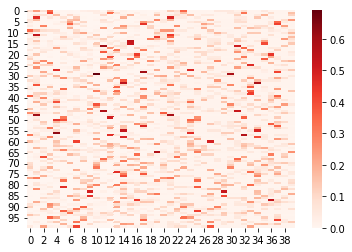

In [ ]:
import seaborn as sns
select_d = theta_dk[:100, ]
select_d_true = theta_total_matrix[:100, ]

sns.heatmap(np.concatenate((select_d_true, select_d), axis=1), cmap='Reds')
plt.show()
# sns.heatmap(select_d
# sns.heatmap(select_d_true, cmap='Reds')
# plt.show()

In [ ]:
theta_raw_code = np.zeros((D, K))
for d in range(D):
  word_indices = np.nonzero(BOW[d])
  freqs = BOW[d, np.nonzero(BOW[d])]
  for v, w in enumerate(word_indices[0]):
    # print(v, w, freqs[0][v])
    for k in range(K):
      if w in S_seed_words[k]:
        theta_raw_code[d][k] += freqs[0][v]

In [ ]:
for d in range(D):
  theta_raw_code[d] /= np.sum(theta_raw_code[d])

In [ ]:
pearson = np.corrcoef(theta_total_matrix.transpose(), theta_raw_code.transpose())
topic_corr = np.zeros(K)
for k in range(K):
  topic_corr[k] = np.amax(pearson[k, K:]) # find the highest correlation coefficent for each d
print(topic_corr.mean())   

pearson = np.corrcoef(theta_total_matrix, theta_raw_code)
doc_corr = np.zeros(D)
for d in range(D):
  doc_corr[d] = np.amax(pearson[d, D:]) # find the highest correlation coefficent for each d
print(doc_corr.mean())
count_doc_corr = doc_corr 

0.8459438928397981
0.8683965404831713


In [ ]:
count_doc_corr-=0.1

In [ ]:
data = {'inferred_doc_corr': inferred_doc_corr, 'count_doc_corr': count_doc_corr}
import pandas as pd
compared_data = pd.DataFrame.from_dict(data)
print(compared_data)

     inferred_doc_corr  count_doc_corr
0             0.903213        0.772211
1             0.889583        0.759768
2             0.910386        0.806380
3             0.912241        0.820807
4             0.826587        0.660899
..                 ...             ...
995           0.936072        0.830352
996           0.940753        0.842029
997           0.792425        0.801992
998           0.762920        0.666416
999           0.842485        0.720066

[1000 rows x 2 columns]


0.871445908314317
0.7683965404831714


([<matplotlib.axis.XTick at 0x7f28ea9f32d0>,
 [Text(0, 0, 'static GTM'), Text(0, 0, 'row count')])

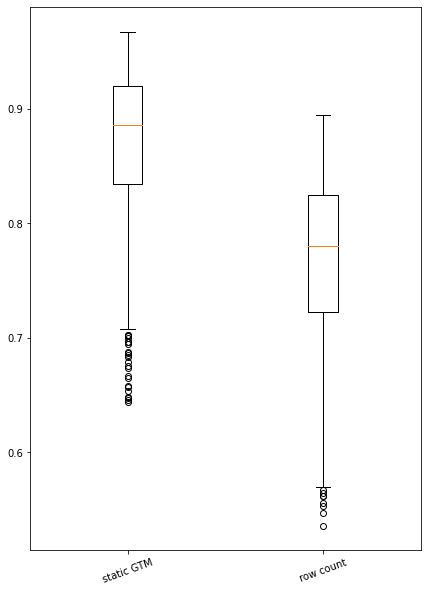

In [ ]:
print(inferred_doc_corr.mean())
print(count_doc_corr.mean())
performance = [inferred_doc_corr.mean(), count_doc_corr.mean()] 
y_pos = np.arange(len(performance))
import pylab 
pylab.rcParams['figure.figsize'] = (7, 10)
# plt.boxplot([inferred_doc_corr,count_doc_corr])
plt.boxplot([inferred_doc_corr,count_doc_corr], positions=[0,1])
plt.xticks([0, 1], ['static GTM', 'row count'], rotation=20) 


In [ ]:
inferred_doc_corr[inferred_doc_corr.argsort()]

array([0.6441294027096318, 0.6455387739860714, 0.6477210999776697, 0.6487039914836256, 0.6534451915601203, 0.6574354059645926, 0.6582924708554543, 0.6649722354651206, 0.6664341433312281, 0.6740234030356043, 0.6755717507801535, 0.6792925752081257, 0.6837171577333049, 0.6849252224893119, 0.6864983447936523, 0.687406834168653 , 0.6949279039666989, 0.6963633619884262, 0.6966527340323757, 0.6967960932486832, 0.7002360121111724, 0.7016506825875373, 0.7023205893831104, 0.7024850835914039, 0.7076240107137077, 0.7090241857198396, 0.7108027071736139, 0.7121094880813904, 0.7121847911828508, 0.7146288265238046, 0.7152189458618423, 0.7159923576317742, 0.7177255507739033, 0.7221022422564167, 0.7227711504722487, 0.7238398563352478, 0.7272057707461733, 0.7286693878800563, 0.7299918360495763, 0.7301978795307504, 0.7310936670577375, 0.7322113481538873, 0.732835556161689 , 0.7331865985223665, 0.7391128371228879, 0.7430131978536775, 0.7434818042587535, 0.7448823359927671, 0.747402759231908 , 0.74801557429

In [ ]:
count_doc_corr[count_doc_corr.argsort()]

array([0.5359117079454545, 0.5474166105906315, 0.5532870554481066, 0.5553526460239641, 0.5618664723245992, 0.5622308293173502, 0.5643968903625985, 0.5674833014544266, 0.5700080004488052, 0.570602538569422 , 0.5706215307359334, 0.5709110185893155, 0.5749565589455042, 0.5795537650105171, 0.5874437585769182, 0.5886137059581403, 0.5940268456997883, 0.596716137738113 , 0.6013308244350646, 0.6022433011296888, 0.6038090987347855, 0.6054685917011894, 0.6058012114490997, 0.6080316473918804, 0.6113748440235247, 0.6114423631024715, 0.6115994196974678, 0.6118167448401683, 0.6121382084675037, 0.6149934494049599, 0.616770109756272 , 0.6168510148073035, 0.6180053467943859, 0.6226557135218053, 0.6235244435719856, 0.6248748651882933, 0.6253108963127099, 0.6254509125088916, 0.6260846750583707, 0.626231687141721 , 0.6268073304039499, 0.6272260823342163, 0.6276322950552454, 0.6287645089039894, 0.6317629987715074, 0.6321888839193452, 0.633490892799198 , 0.6342352854696445, 0.6345859050121611, 0.63489392992